<a href="https://colab.research.google.com/github/hihijimin/python_exercise/blob/master/keras%20%EC%98%81%ED%99%94%20%EB%A6%AC%EB%B7%B0%20%EB%B6%84%EB%A5%98%3A%20%EC%9D%B4%EC%A7%84%20%EB%B6%84%EB%A5%98%20%EC%98%88%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
### 영화 분류 2진 분류 문제
# 2019.11.13

In [3]:
import tensorflow as tf

In [4]:
from keras.datasets import imdb

Using TensorFlow backend.


In [0]:
# from keras.dataset import imdb
(train_data, train_labels),(test_data, test_labels)=imdb.load_data(num_words=10000)

In [6]:
max([max(se) for se in train_data])

9999

In [0]:
#시험삼아 단어 데이터 하나를 바꿔 보겟어 
word_index = imdb.get_word_index()
reverse_word_index =dict([(value, key) for(key, value) in word_index.items()])
decorded_review =' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  result =np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    result[i,sequence]=1.
  return result

x_train =vectorize_sequences(train_data)
x_test =vectorize_sequences(test_data)

In [9]:
x_train[0:].shape

(25000, 10000)

In [0]:
y_train =np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')


In [11]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [12]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss=tf.keras.losses.binary_crossentropy,
              metrics=[tf.keras.metrics.binary_accuracy])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
x_val =x_train[:10000]
partial_x_train =x_train[10000:]
y_val =y_train[:10000]
partial_y_train =y_train[10000:]

In [20]:
#모델 훈련하기
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history=model.fit(partial_x_train, partial_y_train,
                  epochs=5, batch_size=512, validation_data=(x_val,y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 3s 225us/sample - loss: 0.0110 - acc: 0.9979 - val_loss: 0.7195 - val_acc: 0.8654
Epoch 2/5
15000/15000 [==============================] - 1s 97us/sample - loss: 0.0014 - acc: 0.9999 - val_loss: 0.7475 - val_acc: 0.8654
Epoch 3/5
15000/15000 [==============================] - 1s 96us/sample - loss: 0.0049 - acc: 0.9987 - val_loss: 0.8139 - val_acc: 0.8617
Epoch 4/5
15000/15000 [==============================] - 1s 96us/sample - loss: 8.8770e-04 - acc: 0.9999 - val_loss: 0.8072 - val_acc: 0.8633
Epoch 5/5
15000/15000 [==============================] - 1s 100us/sample - loss: 7.3361e-04 - acc: 0.9999 - val_loss: 0.8422 - val_acc: 0.8625


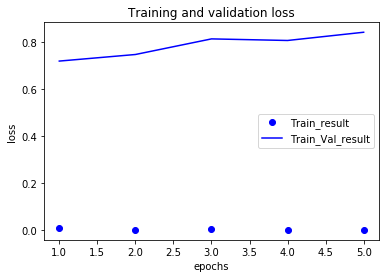

In [21]:
import matplotlib.pyplot as plt

history_dict = history.history
loss =history_dict['loss']
loss_val=history_dict['val_loss']

epochs =range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo',label='Train_result')
plt.plot(epochs, loss_val, 'b', label='Train_Val_result')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

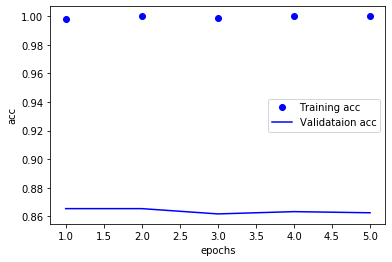

In [22]:
plt.clf()
acc =history_dict['acc']
acc_val =history_dict['val_acc']

plt.plot(epochs, acc, 'bo',label='Training acc')
plt.plot(epochs, acc_val, 'b', label='Validataion acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [23]:
result = model.evaluate(x_test,y_test)

25000/25000 [==============================] - 2s 73us/sample - loss: 0.9207 - acc: 0.8487


In [24]:
model.predict(x_test)

array([[9.4759464e-04],
       [9.9999988e-01],
       [9.9933457e-01],
       ...,
       [5.7944655e-04],
       [3.6761761e-03],
       [4.6501321e-01]], dtype=float32)